In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from scipy import optimize
from scipy.optimize import curve_fit

import os
from functools import reduce
import scipy
from scipy.stats.stats import pearsonr
from scipy import stats
from scipy.stats import ks_2samp
from scipy.stats import entropy
from scipy.stats import norm
from scipy.stats import lognorm
from scipy.stats import nbinom
from scipy.stats import expon
from scipy.stats.mstats import gmean

from scipy import optimize
from scipy.optimize import curve_fit

import statsmodels.api as sm
lowess = sm.nonparametric.lowess
import math

import seaborn as sns

from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.mixture import GaussianMixture

https://science.sciencemag.org/content/358/6360/194.long

In [2]:
dg = pd.read_csv("https://github.com/ucbmcb288/data/blob/master/dge_normalized.txt?raw=true", sep="\t")

In [3]:
dg

,GTACTAATTACN_2,AGGCTAATGGAC_3,TAGACAAAAGCT_4,TCTACTAGTGTN_5,CCGTGCTGAACA_3,GAGAAAATGAAG_7,GCCTAGTGACGT_4,CAGTATCGAGAN_2,AGATTACCCTTC_6,AACCCCACGCTC_2,...,TAGAGGACCGTA_3,TTGGGTAACAGC_3,GTGAGCTTATGG_3,GCTTCTCCGTCT_3,GCTTGGAAATCC_7,GCGATCAGTCTT_3,AGAACGATATAC_8,CCGATTCGCTTN_4,CCTCTCAGTCTC_5,GACTCTCTCGCA_4
128up,2.5699,2.5087,0.0000,0.0000,0.0000,0.0000,0.0000,2.5561,2.5071,2.3432,...,0.0000,0.0000,3.5265,0.0000,0.0000,0.0000,0.0000,1.9716,0.0000,0.0000
140up,1.1599,3.0066,0.0000,0.0000,0.0000,3.2493,3.2082,3.9674,0.0000,0.0000,...,3.4705,0.0000,3.5265,3.1248,2.8336,3.2716,3.4109,2.7748,0.0000,0.0000
14-3-3epsilon,8.8384,8.7878,8.8431,8.8687,8.3452,8.9987,8.7877,8.8601,8.6240,8.7304,...,8.3828,8.1859,9.0986,8.5528,8.8086,8.8982,8.0289,8.3328,8.5545,7.7798
14-3-3zeta,5.9422,5.4336,6.0169,5.0161,6.0097,5.8153,5.6568,5.3236,6.6349,6.0485,...,4.4039,5.4592,6.9919,5.8807,6.3340,6.5884,5.6201,5.1725,4.6401,5.3180
18w,3.4430,3.0066,2.3175,4.0600,3.5326,2.3936,3.2082,2.5561,0.0000,0.0000,...,3.4705,0.0000,0.0000,0.0000,3.7287,0.0000,0.0000,0.0000,5.6108,3.4226
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Zw10,2.8424,3.0066,2.3175,2.2986,0.0000,3.2493,2.3564,2.5561,2.5071,0.0000,...,0.0000,0.0000,0.0000,3.6535,0.0000,0.0000,0.0000,4.2119,3.1664,0.0000
Zwilch,0.0000,1.7423,2.3175,3.1440,0.0000,0.0000,0.0000,0.0000,0.0000,3.7249,...,4.4039,0.0000,0.0000,3.1248,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
zyd,1.1599,1.7423,0.0000,2.2986,3.0086,0.0000,2.3564,2.5561,0.0000,0.0000,...,0.0000,4.4916,0.0000,2.2813,0.0000,0.0000,3.4109,0.0000,0.0000,0.0000
zye,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [4]:
# number of cells

len(dg.columns)

1297

In [5]:
X = (dg.values).T

In [6]:
X.shape

(1297, 8924)

In [7]:
pca = PCA(n_components = 10)

In [8]:
pca.fit(X)

PCA(n_components=10)

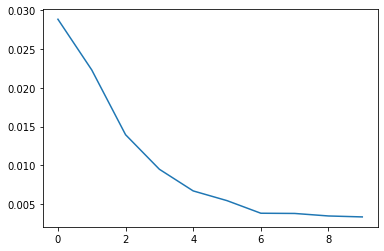

In [9]:
plt.plot(pca.explained_variance_ratio_)

In [10]:
X_pca = pca.transform(X)

In [11]:
X_pca.shape

(1297, 10)

In [12]:
dgpca = pd.DataFrame(data = X_pca)
dgpca['cellID'] = dg.columns
dgpca = dgpca.set_index("cellID")

In [13]:
dgpca

,0,1,2,3,4,5,6,7,8,9
cellID,,,,,,,,,,
GTACTAATTACN_2,-50.578494,-0.722674,4.591521,-8.866938,14.555656,2.268966,-8.031532,-1.791349,3.693293,-6.990147
AGGCTAATGGAC_3,-35.965545,8.530567,-10.002884,-15.239732,5.315496,0.440185,-8.721355,-6.688824,2.529579,-4.449979
TAGACAAAAGCT_4,-31.321712,-8.812651,12.396936,-3.294111,-1.839236,2.035354,-5.640514,-1.269517,6.948502,2.814091
TCTACTAGTGTN_5,-27.194550,6.970546,0.009361,0.720189,28.234866,2.908629,3.624335,0.104757,-10.588807,3.494258
CCGTGCTGAACA_3,-22.801996,-9.786833,-6.722046,-12.423878,-6.067498,11.052304,-5.963358,5.278745,2.592423,2.261297
...,...,...,...,...,...,...,...,...,...,...
GCGATCAGTCTT_3,-8.167339,7.257409,-10.400971,-16.020327,-7.304752,0.413415,5.952791,-0.942149,8.514795,18.630268
AGAACGATATAC_8,44.580706,-17.283488,-14.550696,7.446861,-0.854553,-8.625197,1.323664,1.040635,9.399741,-14.420417
CCGATTCGCTTN_4,-12.608893,-32.890724,-10.119259,4.027930,-9.760443,-0.884845,3.160438,1.608274,4.978020,-7.271485


In [14]:
"PCA 1"

'PCA 1'

In [15]:
v = 18

"PCA %08d" % v 

'PCA 00000018'

In [16]:
v = 5.3289173

"PCA %4.2f" %v

'PCA 5.33'

In [17]:
'Integer %d Float %5.1f' % (10,4.22)

'Integer 10 Float   4.2'

Text(0, 0.5, 'PCA 6')

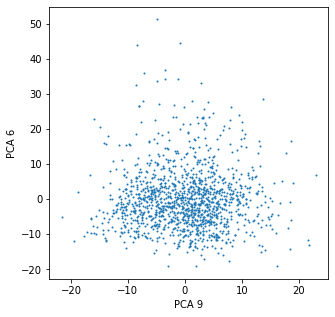

In [18]:
i = 8
j = 5

fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.scatter(dgpca[i],dgpca[j],s=1)
ax.set_xlabel("PCA %d" %(i+1))
ax.set_ylabel("PCA %d" %(j+1))

https://www.oreilly.com/content/an-illustrated-introduction-to-the-t-sne-algorithm/

In [19]:
tsne = TSNE(n_components=2, early_exaggeration = 20, method='exact', random_state = 2056814238)
X_tsne = tsne.fit_transform(X)

/Users/eisen/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/Users/eisen/opt/anaconda3/lib/python3.8/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


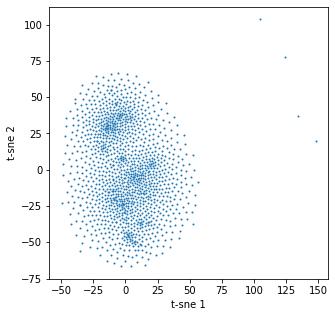

In [53]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.set_xlabel("t-sne 1")
ax.set_ylabel("t-sne 2")
ax.scatter(X_tsne[:,0],X_tsne[:,1],s=1)

In [40]:
tsne = TSNE(n_components=2, early_exaggeration = 20, method='exact', random_state = 2056814238)
X_pca_tsne = tsne.fit_transform(X_pca)

In [185]:
X_pca_tsne.shape

(1297, 2)

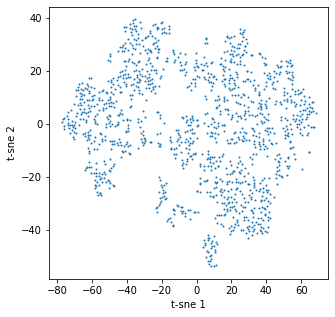

In [58]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.set_xlabel("t-sne 1")
ax.set_ylabel("t-sne 2")
ax.scatter(X_pca_tsne[:,0],X_pca_tsne[:,1],s=1)

In [181]:
gmm = GaussianMixture(n_components=15)

In [182]:
gmmX = gmm.fit(X_pca_tsne)

In [183]:
gmmXp = gmmX.predict(X_pca_tsne)

In [186]:
gmmXp.shape

(1297,)

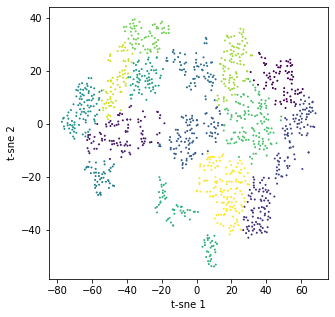

In [184]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.set_xlabel("t-sne 1")
ax.set_ylabel("t-sne 2")
ax.scatter(X_pca_tsne[:,0],X_pca_tsne[:,1],s=1, c=gmmXp)

In [68]:
tsne2 = TSNE(n_components=2, early_exaggeration = 20, method='exact', random_state = np.random.choice(range(0,100000000)))
X_pca_tsne2 = tsne2.fit_transform(X_pca)

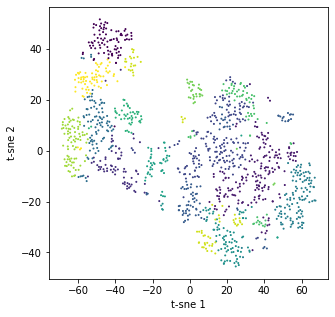

In [69]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.set_xlabel("t-sne 1")
ax.set_ylabel("t-sne 2")
ax.scatter(X_pca_tsne2[:,0],X_pca_tsne2[:,1],s=1, c=gmmXp)

In [187]:
Xm = np.mean(X_pca,axis=0)
Xsd = np.std(X_pca,axis=0)

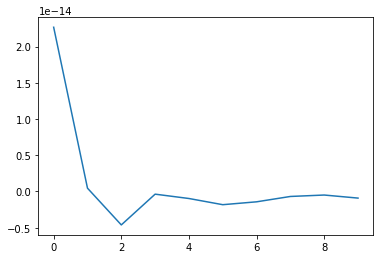

In [188]:
plt.plot(Xm)

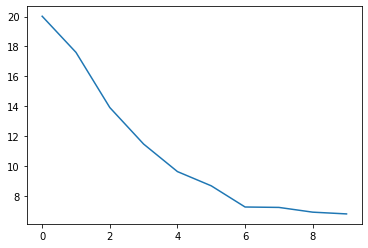

In [189]:
plt.plot(Xsd)

In [51]:
X_pca_scaled = (X_pca - Xm) / Xsd

In [52]:
tsne = TSNE(n_components=2, early_exaggeration = 20, method='exact', random_state = 2056814238)
X_pca_scaled_tsne = tsne.fit_transform(X_pca_scaled)

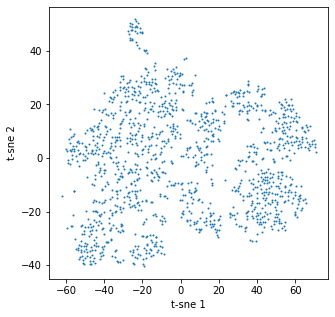

In [65]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.set_xlabel("t-sne 1")
ax.set_ylabel("t-sne 2")
ax.scatter(X_pca_scaled_tsne[:,0],X_pca_scaled_tsne[:,1],s=1)

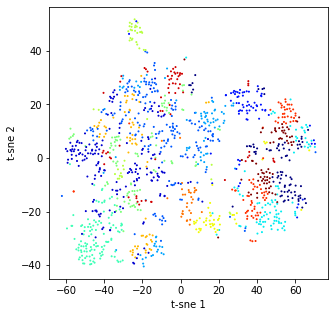

In [67]:
fig,ax = plt.subplots(1,1,figsize=(5,5))
ax.set_xlabel("t-sne 1")
ax.set_ylabel("t-sne 2")
ax.scatter(X_pca_scaled_tsne[:,0],X_pca_scaled_tsne[:,1],s=1,c=gmmXp,cmap='jet')

In [92]:
insitu_bin = pd.read_csv("insitu_matrix.txt",sep=' ')

In [93]:
insitu_bin

,aay,Ama,Ance,Antp,apt,Blimp-1,bmm,bowl,brk,Btk29A,...,tkv,tll,toc,Traf4,trn,tsh,twi,zen,zen2,zfh1
0,0,1,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
1,0,1,0,0,1,1,1,1,1,1,...,0,0,0,1,1,0,1,0,0,0
2,0,0,0,0,1,1,1,1,0,1,...,0,0,0,0,0,0,1,0,0,0
3,0,1,0,0,1,1,1,1,1,1,...,0,0,0,1,1,0,1,0,0,0
4,0,0,0,0,1,1,1,1,1,1,...,0,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3034,0,0,0,1,0,1,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
3035,1,0,0,0,1,0,0,1,1,1,...,1,1,0,1,0,0,0,0,0,0
3036,0,1,0,0,0,1,1,0,1,0,...,1,0,0,0,1,0,1,0,0,0
3037,1,1,0,1,0,0,0,0,0,0,...,1,0,0,1,1,1,1,0,0,0


In [94]:
gdf = pd.read_csv("geometry.txt",sep=" ")

In [95]:
gdf

,x,y,z
0,-194.042242,0.221890,30.195476
1,-203.322900,1.928557,20.081308
2,-200.250107,3.588368,23.932470
3,-205.875337,3.577224,14.820966
4,-193.173936,9.531855,29.667388
...,...,...,...
3034,-16.754806,63.306474,27.299752
3035,166.074792,5.717830,44.866596
3036,-118.396337,33.403262,-48.864773
3037,-20.054276,3.220607,-78.112121


In [96]:
insitu = insitu_bin.join(gdf)

In [190]:
insitu

,aay,Ama,Ance,Antp,apt,Blimp-1,bmm,bowl,brk,Btk29A,...,Traf4,trn,tsh,twi,zen,zen2,zfh1,x,y,z
0,0,1,0,0,1,1,1,1,1,1,...,0,0,0,1,0,0,0,-194.042242,0.221890,30.195476
1,0,1,0,0,1,1,1,1,1,1,...,1,1,0,1,0,0,0,-203.322900,1.928557,20.081308
2,0,0,0,0,1,1,1,1,0,1,...,0,0,0,1,0,0,0,-200.250107,3.588368,23.932470
3,0,1,0,0,1,1,1,1,1,1,...,1,1,0,1,0,0,0,-205.875337,3.577224,14.820966
4,0,0,0,0,1,1,1,1,1,1,...,0,0,0,1,0,0,0,-193.173936,9.531855,29.667388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3034,0,0,0,1,0,1,0,0,0,1,...,0,0,1,0,0,0,0,-16.754806,63.306474,27.299752
3035,1,0,0,0,1,0,0,1,1,1,...,1,0,0,0,0,0,0,166.074792,5.717830,44.866596
3036,0,1,0,0,0,1,1,0,1,0,...,0,1,0,1,0,0,0,-118.396337,33.403262,-48.864773
3037,1,1,0,1,0,0,0,0,0,0,...,1,1,1,1,0,0,0,-20.054276,3.220607,-78.112121


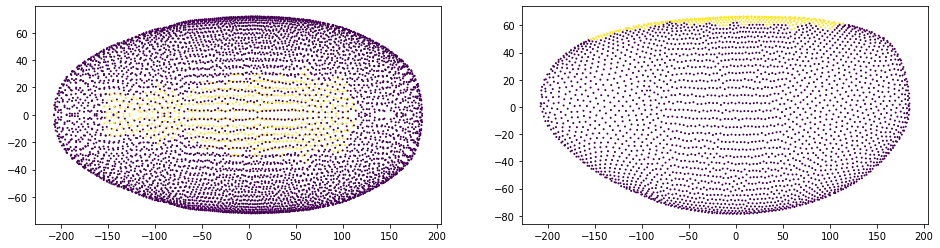

In [195]:
g = 'zen'

fig,ax = plt.subplots(1,2,figsize=(16,4))
ax[0].scatter(insitu.x,insitu.y,s=1,c=insitu[g])
ax[0].scatter(insitu.x,-insitu.y,s=1,c=insitu[g])
ax[1].scatter(insitu.x,insitu.z,s=1,c=insitu[g])


In [105]:
insitu.columns

Index(['aay', 'Ama', 'Ance', 'Antp', 'apt', 'Blimp-1', 'bmm', 'bowl', 'brk',
       'Btk29A', 'bun', 'cad', 'CenG1A', 'CG10479', 'CG11208', 'CG14427',
       'CG17724', 'CG17786', 'CG43394', 'CG8147', 'cnc', 'croc', 'Cyp310a1',
       'D', 'dan', 'danr', 'Dfd', 'disco', 'Doc2', 'Doc3', 'dpn', 'edl', 'ems',
       'erm', 'Esp', 'E(spl)m5-HLH', 'eve', 'exex', 'fj', 'fkh', 'ftz', 'gk',
       'gt', 'h', 'hb', 'hkb', 'htl', 'Ilp4', 'ImpE2', 'ImpL2', 'ken', 'kni',
       'knrl', 'Kr', 'lok', 'Mdr49', 'Mes2', 'MESR3', 'mfas', 'Nek2', 'NetA',
       'noc', 'nub', 'numb', 'oc', 'odd', 'peb', 'prd', 'pxb', 'rau', 'rho',
       'run', 'sna', 'srp', 'tkv', 'tll', 'toc', 'Traf4', 'trn', 'tsh', 'twi',
       'zen', 'zen2', 'zfh1', 'x', 'y', 'z'],
      dtype='object')

In [108]:
insitu_dg_genes = [g for g in insitu.columns if g in dg.index]

In [109]:
dg_insitu = dg.loc[insitu_dg_genes]

In [120]:
dg_insitu

,GTACTAATTACN_2,AGGCTAATGGAC_3,TAGACAAAAGCT_4,TCTACTAGTGTN_5,CCGTGCTGAACA_3,GAGAAAATGAAG_7,GCCTAGTGACGT_4,CAGTATCGAGAN_2,AGATTACCCTTC_6,AACCCCACGCTC_2,...,TAGAGGACCGTA_3,TTGGGTAACAGC_3,GTGAGCTTATGG_3,GCTTCTCCGTCT_3,GCTTGGAAATCC_7,GCGATCAGTCTT_3,AGAACGATATAC_8,CCGATTCGCTTN_4,CCTCTCAGTCTC_5,GACTCTCTCGCA_4
aay,3.8658,4.1226,0.0000,2.2986,4.6819,4.1714,0.0000,3.4279,0.0000,2.3432,...,5.3694,0.0000,5.4294,4.3439,4.6733,4.1949,0.0000,1.9716,0.0000,3.4226
Ama,4.9367,1.7423,7.7824,4.8298,6.6391,6.5638,7.2618,6.8235,8.0663,6.3661,...,0.0000,3.5544,7.9250,5.5649,5.2392,3.2716,6.4550,6.7697,3.1664,7.7145
Ance,1.1599,1.7423,0.0000,0.0000,0.0000,0.0000,3.7401,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Antp,1.7945,1.7423,4.3871,0.0000,4.8675,5.1308,3.2082,5.1361,4.3030,2.3432,...,4.9659,6.0332,6.8674,4.8089,4.2769,4.1949,0.0000,1.9716,3.1664,3.4226
apt,4.9937,5.4336,4.6385,5.3290,3.5326,4.9440,3.2082,3.4279,0.0000,4.8836,...,3.4705,0.0000,0.0000,4.5950,5.9608,0.0000,4.9025,0.0000,4.6401,2.5513
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zen,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.6102,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
zen2,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,4.3030,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
zfh1,4.3751,0.0000,5.4864,0.0000,4.6819,4.7294,5.0861,2.5561,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,5.3054,3.9644,0.0000,4.6615
y,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,...,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000


In [111]:
Xdi = dg_insitu.values.T

In [112]:
Xdi.shape


(1297, 86)

In [115]:
Xi = insitu[insitu_dg_genes].values

In [116]:
Xi.shape

(3039, 86)

In [117]:
from scipy.stats import pearsonr

In [126]:
c = 400

corrs = []

for i in Xi:
    corrs.append(pearsonr(Xdi[c],i)[0])

(array([   6.,   28., 1096.,  514.,  270.,  209.,  211.,  271.,  260.,
         174.]),
 array([-0.21523443, -0.18090367, -0.1465729 , -0.11224213, -0.07791137,
        -0.0435806 , -0.00924984,  0.02508093,  0.05941169,  0.09374246,
         0.12807322]),
 <a list of 10 Patch objects>)

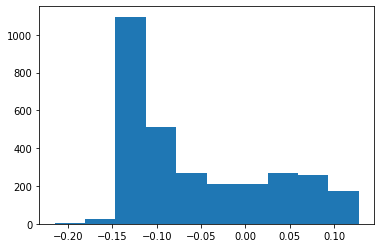

In [127]:
plt.hist(corrs)

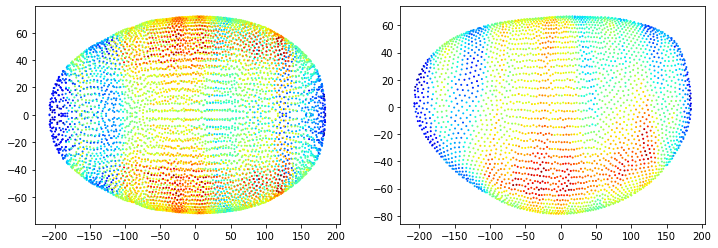

In [157]:
c = 400

corrs = []

for i in Xi:
    corrs.append(pearsonr(Xdi[c],i)[0])
    
fig,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].scatter(insitu.x,insitu.y,s=1,c=corrs,cmap='jet')
ax[0].scatter(insitu.x,-insitu.y,s=1,c=corrs,cmap='jet')
ax[1].scatter(insitu.x,insitu.z,s=1,c=corrs,cmap='jet')


In [144]:
bdt = pd.read_csv("bdtnp.txt",sep="\t")

In [145]:
bdt

,aay,Ama,Ance,Antp,apt,Blimp-1,bmm,bowl,brk,Btk29A,...,tkv,tll,toc,Traf4,trn,tsh,twi,zen,zen2,zfh1
0,0.116516,0.224190,0.033730,0.104307,0.673878,0.856570,0.469676,0.286151,0.320923,0.737946,...,0.353227,0.102896,0.153453,0.129360,0.087361,0.147089,0.225082,0.027564,0.297847,0.372422
1,0.113320,0.208761,0.044785,0.103447,0.743820,0.462554,0.570401,0.345240,0.320727,0.913163,...,0.268072,0.093506,0.206405,0.313327,0.230506,0.190749,0.440296,0.024157,0.455723,0.389489
2,0.092872,0.172598,0.036166,0.096985,0.838291,0.467538,0.478229,0.377768,0.297598,0.931254,...,0.315466,0.090488,0.196441,0.161869,0.102645,0.177968,0.347098,0.019817,0.598716,0.502384
3,0.101251,0.207963,0.066009,0.092872,0.597823,0.497481,0.479122,0.580058,0.334111,0.746340,...,0.211007,0.110080,0.205833,0.287976,0.382287,0.189138,0.542763,0.019013,0.570066,0.397117
4,0.127009,0.176440,0.084271,0.027938,0.621983,0.833522,0.680243,0.201147,0.359235,0.755608,...,0.447295,0.079012,0.152232,0.105062,0.109857,0.166762,0.259750,0.025874,0.349462,0.498263
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3034,0.108630,0.123423,0.072152,0.460941,0.274066,0.591140,0.215415,0.226733,0.139501,0.657080,...,0.151405,0.043510,0.030431,0.119654,0.121339,0.911462,0.103898,0.142042,0.426652,0.537250
3035,1.489714,0.144034,0.049330,0.081190,0.821476,0.312973,0.108817,0.236404,0.679630,0.482218,...,0.630117,0.349061,0.041103,0.432099,0.123119,0.111749,0.089729,0.043411,0.606762,0.629268
3036,0.095975,0.648871,0.014741,0.184826,0.357911,0.406147,0.400752,0.308844,0.437903,0.133464,...,0.466361,0.085663,0.055872,0.270265,0.359610,0.156088,0.444891,0.017977,0.125641,0.380294
3037,0.220409,0.751017,0.048882,0.331598,0.189880,0.278077,0.177882,0.182164,0.107902,0.188577,...,0.578350,0.065762,0.041828,0.503958,0.187839,0.852346,0.937886,0.039697,0.340491,0.286497


In [146]:
insitu_bdt_genes = [g for g in bdt.columns if g in dg.index]

In [151]:
dg_bdt = dg.loc[insitu_bdt_genes]

In [152]:
Xdi = dg_bdt.values.T

In [156]:
Xdi.shape

(1297, 84)

In [153]:
Xi = bdt[insitu_bdt_genes].values

In [154]:
Xi.shape

(3039, 84)

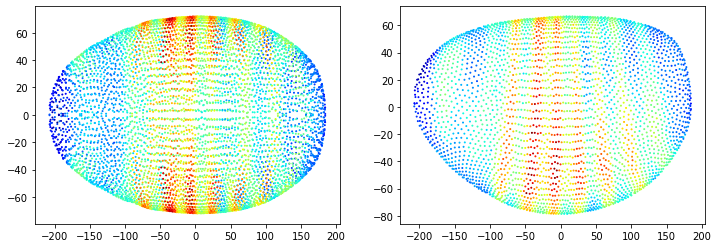

In [160]:
c = 200

corrs = []

for i in Xi:
    corrs.append(pearsonr(Xdi[c],i)[0])
    
fig,ax = plt.subplots(1,2,figsize=(12,4))
ax[0].scatter(insitu.x,insitu.y,s=1,c=corrs,cmap='jet')
ax[0].scatter(insitu.x,-insitu.y,s=1,c=corrs,cmap='jet')
ax[1].scatter(insitu.x,insitu.z,s=1,c=corrs,cmap='jet')
